In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("600280.SS.csv")

In [3]:
## Calculate Return
data = data.reset_index()
data["shift"] =  data["Adj Close"].shift()
data["Return"] = (data["Adj Close"] - data["shift"])/data["shift"]
data = data.drop(["Open", "High", "Low", "shift"], axis = 1)
data = data.drop(["index"], axis = 1).iloc[1:,:]
data

,Date,Close,Adj Close,Volume,Return
1,2000-09-27,1.794982,1.523565,74228665.0,0.012195
2,2000-09-28,1.801470,1.529072,50998771.0,0.003615
3,2000-09-29,1.840397,1.562113,31769256.0,0.021609
4,2000-10-02,NaN,NaN,NaN,NaN
5,2000-10-03,NaN,NaN,NaN,NaN
6,2000-10-04,NaN,NaN,NaN,NaN
7,2000-10-05,NaN,NaN,NaN,NaN
8,2000-10-06,NaN,NaN,NaN,NaN
9,2000-10-09,1.814446,1.540086,18375794.0,NaN
10,2000-10-10,1.886894,1.601579,24968813.0,0.039928


In [4]:
## Select Specific Date
stock_data = data
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
start_date = "2017-09-13"; end_date = "2022-09-16"
period = (stock_data['Date'] > start_date) & (stock_data['Date'] <= end_date)
stock_data = stock_data.loc[period]
stock_data

,Date,Close,Adj Close,Volume,Return
4222,2017-09-14,8.37,8.355717,7800452.0,-0.005938
4223,2017-09-15,8.53,8.515444,10174073.0,0.019116
4224,2017-09-18,8.63,8.615273,12723794.0,0.011723
4225,2017-09-19,8.59,8.575341,14128322.0,-0.004635
4226,2017-09-20,8.60,8.585324,5468004.0,0.001164
4227,2017-09-21,8.55,8.535410,4937269.0,-0.005814
4228,2017-09-22,8.45,8.435580,5162056.0,-0.011696
4229,2017-09-25,8.20,8.186007,5231832.0,-0.029586
4230,2017-09-26,8.38,8.365700,5057239.0,0.021951
4231,2017-09-27,8.53,8.515444,6835968.0,0.017900


In [5]:
## Problem 1
def skew_kurtosis_cal(df, start_date, end_date):
    period = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    stock_each_period_df = df.loc[period]
    stock_return_mean = stock_each_period_df["Return"].mean()
    stock_return_sd = stock_each_period_df["Return"].std()
    stock_return_skew = stock_each_period_df["Return"].skew()
    stock_return_kurt = stock_each_period_df["Return"].kurt()
    stock_trade_num = len(stock_each_period_df["Return"])
    stock_return_JB = stock_return_skew**2/(6/stock_trade_num) + (stock_return_kurt - 3)**2/(24/stock_trade_num)
    return [stock_return_mean, 
            stock_return_sd, 
            stock_return_skew, 
            stock_return_kurt, 
            stock_trade_num, 
            stock_return_JB]

In [6]:
stats_list = ["移动平均日收益率","移动平均日收益率标准差","skew日收益率偏度","kurtosis日收益率峰度","交易日","JBtest"]
p1_result_df = pd.DataFrame({
    "stats":   stats_list,
    "3 month": skew_kurtosis_cal(stock_data, "2022-06-16", "2022-09-16"),
    "1 year":  skew_kurtosis_cal(stock_data, "2021-09-16", "2022-09-16"),
    "2 year":  skew_kurtosis_cal(stock_data, "2020-09-16", "2022-09-16"),
    "3 year":  skew_kurtosis_cal(stock_data, "2019-09-16", "2022-09-16"),
    "5 year":  skew_kurtosis_cal(stock_data, "2017-09-16", "2022-09-16")
})
p1_result_df

,stats,3 month,1 year,2 year,3 year,5 year
0,移动平均日收益率,0.000831,-0.000577,0.001227,-0.000009,-0.000548
1,移动平均日收益率标准差,0.014057,0.025514,0.027925,0.028276,0.029444
2,skew日收益率偏度,0.039562,0.015148,0.174987,0.154745,-1.299220
3,kurtosis日收益率峰度,-0.152924,3.356435,1.244723,1.924072,16.706790
4,交易日,66.000000,242.000000,486.000000,730.000000,1213.000000
5,JBtest,27.354765,1.290298,64.870478,38.124391,9836.822112


In [7]:
p1_result_df.to_excel("Problem 1 Result.xlsx")

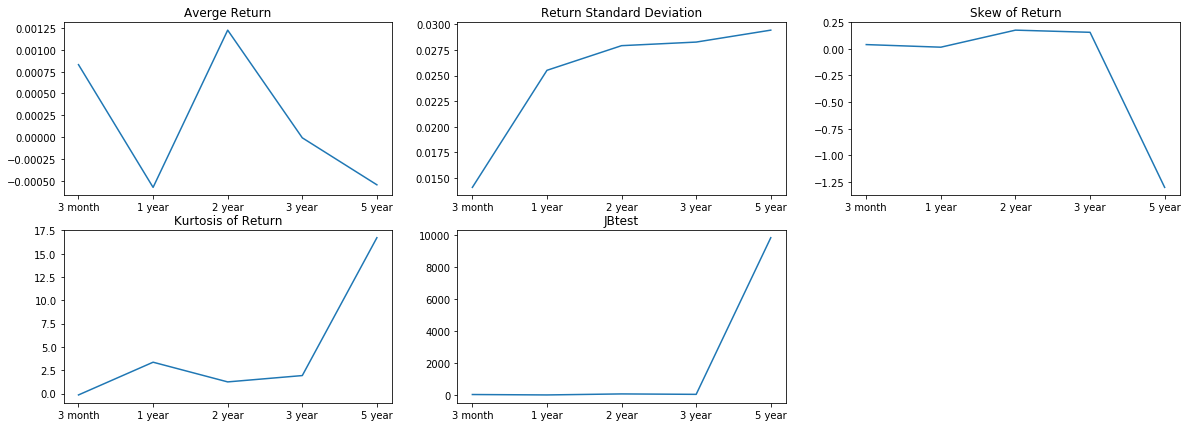

In [8]:
## Plot
plt.figure(figsize=(20, 7)) 
plt.subplot(2,3,1)
plt.title("Averge Return")  
plt.plot(p1_result_df.columns.tolist()[1:], p1_result_df.iloc[0,1:])
plt.subplot(2,3,2)
plt.title("Return Standard Deviation")  
plt.plot(p1_result_df.columns.tolist()[1:], p1_result_df.iloc[1,1:])
plt.subplot(2,3,3)
plt.title("Skew of Return")  
plt.plot(p1_result_df.columns.tolist()[1:], p1_result_df.iloc[2,1:])
plt.subplot(2,3,4)
plt.title("Kurtosis of Return")  
plt.plot(p1_result_df.columns.tolist()[1:], p1_result_df.iloc[3,1:])
plt.subplot(2,3,5)
plt.title("JBtest")  
plt.plot(p1_result_df.columns.tolist()[1:], p1_result_df.iloc[5,1:])
plt.show()

In [9]:
## Problem 2
margin_data = data.set_index("Date")
def marginal_return_analysis(df, year):
    stock_each_period_df = df.loc[year]
    stock_return_mean = stock_each_period_df["Return"].mean()
    stock_return_sd = stock_each_period_df["Return"].std()
    stock_trade_num = len(stock_each_period_df["Return"])
    stock_year_return_mean = stock_return_mean*stock_trade_num
    stock_month_return_mean = stock_year_return_mean/12
    stock_year_return_sd = stock_return_sd*stock_trade_num
    stock_month_return_sd = stock_year_return_sd/12
    return [stock_return_mean, 
            stock_return_sd, 
            stock_trade_num, 
            stock_month_return_mean, 
            stock_month_return_sd, 
            stock_year_return_mean, 
            stock_year_return_sd]

In [10]:
stats_list = ["日收益均值","日收益率标准差","交易日","累计月收益均值","累计月收益标准差","累计年收益均值","累计年收益标准差"]
p2_result_df = pd.DataFrame({
    "stats": stats_list,
    "2021": marginal_return_analysis(margin_data, "2021"),
    "2020": marginal_return_analysis(margin_data, "2020"),
    "2019": marginal_return_analysis(margin_data, "2019"),
    "2018": marginal_return_analysis(margin_data, "2018"),
    "2017": marginal_return_analysis(margin_data, "2017")
})
p2_result_df

,stats,2021,2020,2019,2018,2017
0,日收益均值,0.001237,-0.000142,-0.000245,-0.003021,-0.000162
1,日收益率标准差,0.028784,0.031602,0.028335,0.032485,0.019087
2,交易日,243.000000,243.000000,242.000000,243.000000,244.000000
3,累计月收益均值,0.025041,-0.002868,-0.004934,-0.061175,-0.003296
4,累计月收益标准差,0.582873,0.639938,0.571431,0.657821,0.388104
5,累计年收益均值,0.300491,-0.034413,-0.059212,-0.734099,-0.039553
6,累计年收益标准差,6.994472,7.679260,6.857173,7.893856,4.657243


In [11]:
p2_result_df.to_excel("Problem 2 Result.xlsx")

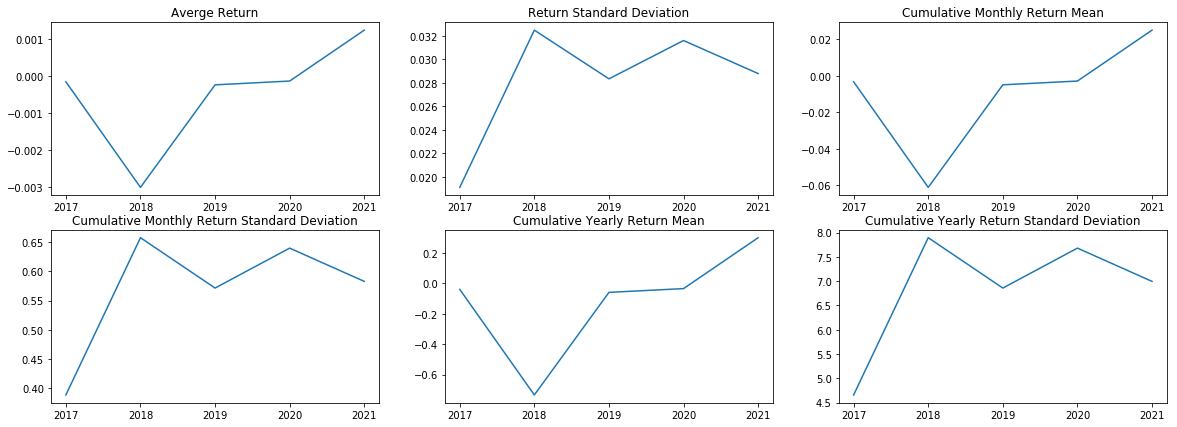

In [12]:
## Plot
plt.figure(figsize=(20, 7)) 
plt.subplot(2,3,1)
plt.title("Averge Return")  
plt.plot(p2_result_df.columns.tolist()[::-1][:-1], p2_result_df.iloc[0,1:].tolist()[::-1])
plt.subplot(2,3,2)
plt.title("Return Standard Deviation")  
plt.plot(p2_result_df.columns.tolist()[::-1][:-1], p2_result_df.iloc[1,1:].tolist()[::-1])
plt.subplot(2,3,3)
plt.title("Cumulative Monthly Return Mean")  
plt.plot(p2_result_df.columns.tolist()[::-1][:-1], p2_result_df.iloc[3,1:].tolist()[::-1])
plt.subplot(2,3,4)
plt.title("Cumulative Monthly Return Standard Deviation")  
plt.plot(p2_result_df.columns.tolist()[::-1][:-1], p2_result_df.iloc[4,1:].tolist()[::-1])
plt.subplot(2,3,5)
plt.title("Cumulative Yearly Return Mean")  
plt.plot(p2_result_df.columns.tolist()[::-1][:-1], p2_result_df.iloc[5,1:].tolist()[::-1])
plt.subplot(2,3,6)
plt.title("Cumulative Yearly Return Standard Deviation")  
plt.plot(p2_result_df.columns.tolist()[::-1][:-1], p2_result_df.iloc[6,1:].tolist()[::-1])
plt.show()

In [13]:
## attention: numOfpart is 15 means cut 15 times, which indicates that the list will be divdided into 16 parts. 
def divide_avg(start_num, end_num, numOfpart):
    return_list = []
    distance = abs(end_num - start_num)
    each_distance = abs(end_num - start_num)/numOfpart
    for i in range(numOfpart+1):
        return_list.append(round(start_num+each_distance*i,2))
    return return_list

def calculte_num(part_list, df):
    count_list = []
    name_list = []
    for j in range(len(part_list)-1):
        count = 0
        for i in df.tolist():
            if part_list[j] < i <= part_list[j+1]:
                count += 1
        count_list.append(count)
        name_list.append("("+str(part_list[j])+","+str(part_list[j+1])+")")
    count_list[0] = count_list[0] + 1
    result_df = pd.DataFrame({"区间":name_list, "数量":count_list})
    return result_df

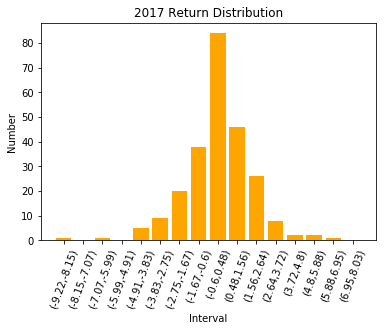

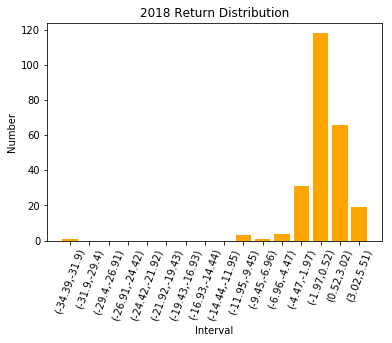

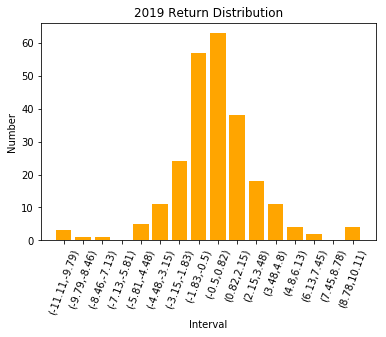

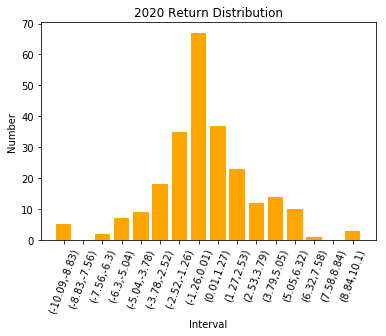

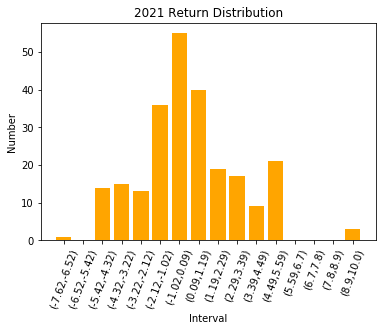

In [14]:
for i in ["2017", "2018", "2019", "2020", "2021"]:
    stock_each_period_df = margin_data.loc[i]
    stock_df_order = stock_each_period_df.sort_values("Return")
    stock_df_order["Return"] = round(stock_df_order["Return"]*100,4)
    df = calculte_num(divide_avg(stock_df_order.iloc[0,3], stock_df_order.iloc[-1,3], 16), stock_df_order["Return"])   
    plt.bar(range(len(df["数量"])),  df["数量"], tick_label=df["区间"], color = "orange", align='center')
    plt.xticks(rotation=70) 
    plt.xlabel("Interval")
    plt.ylabel("Number")
    plt.title(i+" Return Distribution")
    plt.show()